# Finding Centre of Mass of Ligands for Docking using LeDock

In [32]:
from rdkit import Chem
from rdkit.Geometry import Point3D

import pandas as pd
import numpy as np
import os, glob

In [67]:
def calculate_centre_of_mass(sdf_file):
    # Read the .sdf file
    mol = Chem.SDMolSupplier(sdf_file, removeHs = False, sanitize = False)[0]
    # Assuming there is only one molecule in the file

    # Calculate the center of mass
    centre_of_mass = np.array([0.0, 0.0, 0.0])
    total_mass = 0.0
    
    for atom in mol.GetAtoms():
        _atom_mass = atom.GetMass()
        _atom_coords = mol.GetConformer().GetAtomPosition(atom.GetIdx())
        atom_mass = np.array([_atom_mass, _atom_mass, _atom_mass])
        atom_coords = np.array([_atom_coords[0], _atom_coords[1], _atom_coords[2]])
        centre_of_mass += atom_mass * atom_coords
        total_mass += _atom_mass
    
    centre_of_mass /= np.array([total_mass, total_mass, total_mass])

    return centre_of_mass

Assume that you have stored the PDBbind database at the directory as mentioned.

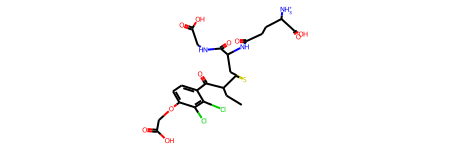

In [60]:
mol2_file_path = '../../download/v2020-other-PL/11gs/11gs_ligand.sdf'
mol = Chem.SDMolSupplier(mol2_file_path)[0]
mol

In [61]:
com = calculate_centre_of_mass(mol2_file_path)
print(f"Centre of Mass: {com[0]:.3f}, {com[1]:.3f}, {com[2]:.3f}")

Centre of Mass: 9.217, 5.222, 27.027


In [62]:
centre_of_mass = np.array([0.0, 0.0, 0.0])
total_mass = 0.0
for atom in mol.GetAtoms():
    _atom_mass = atom.GetMass()
    _atom_coords = mol.GetConformer().GetAtomPosition(atom.GetIdx())
    atom_mass = np.array([_atom_mass, _atom_mass, _atom_mass])
    atom_coords = np.array([_atom_coords[0], _atom_coords[1], _atom_coords[2]])
    centre_of_mass += atom_mass * atom_coords
    total_mass += _atom_mass
centre_of_mass /= np.array([total_mass, total_mass, total_mass])
print(centre_of_mass)

[ 9.21687027  5.22203154 27.02683079]


Now, we performed calculation on all compounds.

In [63]:
filePathtoGeneralSet = glob.glob(os.path.join('../../download/v2020-other-PL', "*"))
filePathtoRefinedSet = glob.glob(os.path.join('../../download/refined-set', "*"))
print(f"There are {len(filePathtoGeneralSet)} files in General Set and {len(filePathtoRefinedSet)} files in the Refined Set.")

There are 14129 files in General Set and 5318 files in the Refined Set.


For general set,

In [70]:
id, coords_x, coords_y, coords_z, exclusion_list = list(), list(), list(), list(), list()
for i in range(len(filePathtoGeneralSet)):
    _id = str(filePathtoGeneralSet[i].split("/")[-1])
    if _id in ['index', 'readme']: continue
    try:
        com = calculate_centre_of_mass(filePathtoGeneralSet[i] + "/" + _id + "_ligand.sdf")
    except AttributeError:
        exclusion_list.append(_id)
        continue
    id.append(_id)
    coords_x.append(round(com[0], 3))
    coords_y.append(round(com[1], 3))
    coords_z.append(round(com[2], 3))
comGeneralSet = {'pdb_id': id, 'com_x': coords_x, 'com_y': coords_y, 'com_z': coords_z}
df = pd.DataFrame(comGeneralSet)
with open('general-set-com.txt', 'a') as file:
    df_string = df.to_string(header=False, index=False)
    file.write(df_string)

print(f"Excluded molecules: {exclusion_list}")

[03:44:12] 

****
Post-condition Violation
Element 'Du' not found
Violation occurred on line 93 in file /home/conda/feedstock_root/build_artifacts/rdkit_1651075169244/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[03:44:12] ERROR: Element 'Du' not found
[03:44:12] ERROR: moving to the beginning of the next molecule
[03:44:16] 

****
Post-condition Violation
Element 'Du' not found
Violation occurred on line 93 in file /home/conda/feedstock_root/build_artifacts/rdkit_1651075169244/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[03:44:16] ERROR: Element 'Du' not found
[03:44:16] ERROR: moving to the beginning of the next molecule
[03:44:18] 

****
Post-condition Violation
Element 'Du' not found
Violation occurred on line 93 in file /home/conda/feedstock_root/build_artifacts/rdkit_1651075169244/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[03:44:18] ERROR: Element 'Du' not found
[03:44:18] ERROR: moving to the beginnin

Excluded molecules: ['2foy', '3bho', '2fov', '3qlb', '2fou']


For refined set,

In [72]:
id, coords_x, coords_y, coords_z, exclusion_list = list(), list(), list(), list(), list()
for i in range(len(filePathtoRefinedSet)):
    _id = str(filePathtoRefinedSet[i].split("/")[-1])
    if _id in ['index', 'readme']: continue
    try:
        com = calculate_centre_of_mass(filePathtoRefinedSet[i] + "/" + _id + "_ligand.sdf")
    except AttributeError:
        exclusion_list.append(_id)
        continue
    id.append(_id)
    coords_x.append(round(com[0], 3))
    coords_y.append(round(com[1], 3))
    coords_z.append(round(com[2], 3))
comRefinedSet = {'pdb_id': id, 'com_x': coords_x, 'com_y': coords_y, 'com_z': coords_z}
df = pd.DataFrame(comRefinedSet)
with open('refined-set-com.txt', 'a') as file:
    df_string = df.to_string(header=False, index=False)
    file.write(df_string)

print(f"Excluded molecules: {exclusion_list}")

Excluded molecules: []
